# Project Walkthrough

1. You don't have to split your project into 3 components. Use one .ipynb file and zip it. (or convert to PDF)
2. Submit 1 file for all 3 boxes and add the following in the additional remarks box: "I submitted the same file for all 3 boxes which addresses all components (code, visuals, and observations)" 

In [4]:
data_path = '/Users/bassel_instructor/Documents/Datasets/'

In [2]:
import pandas as pd
import numpy as np

## Sales Analysis Project

### 1. Data Wrangling

In [6]:
df = pd.read_csv(data_path+'AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [7]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

#### Step C

> **IMPORTANT** Either make a separate copy for normalized data or save this step until later and after EDA.

Step D
> Discuss how the data can be chunked and split into subgroups or grouped by categories:
Examples: 

Examples:
- Grouping by "Group" column
- Splitting the data into different months (3 subgroups)
- Grouping by Time

### 2. Data Analysis

- Step B - aggregate by "Group" column and sum of sales.
- Step C - Repetitive - build the same thing as a visual instead of table. (Pie Chart or Bar Chart)

In [8]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

### Step D
We have 2 methods:

1. Get the date parts from the date
2. Use the `resample` function

In [9]:
# convert Date column to datetime

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

Now we can derive date parts from the date data type


In [10]:
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Date,Time,State,Group,Unit,Sales,Week
0,2020-10-01,Morning,WA,Kids,8,20000,40
1,2020-10-01,Morning,WA,Men,8,20000,40
2,2020-10-01,Morning,WA,Women,4,10000,40
3,2020-10-01,Morning,WA,Seniors,15,37500,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,40


In [11]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Time,State,Group,Unit,Sales,Week,Month
0,2020-10-01,Morning,WA,Kids,8,20000,40,10
1,2020-10-01,Morning,WA,Men,8,20000,40,10
2,2020-10-01,Morning,WA,Women,4,10000,40,10
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10


In [12]:
df['Month_Name'] = df['Date'].dt.strftime('%b')
df.head()

,Date,Time,State,Group,Unit,Sales,Week,Month,Month_Name
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,Oct
1,2020-10-01,Morning,WA,Men,8,20000,40,10,Oct
2,2020-10-01,Morning,WA,Women,4,10000,40,10,Oct
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,Oct
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,Oct


Method 2:

In [13]:
df_2 = df.set_index(['Date'], drop=True)
df_2.head()

,Time,State,Group,Unit,Sales,Week,Month,Month_Name
Date,,,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,40,10,Oct
2020-10-01,Morning,WA,Men,8,20000,40,10,Oct
2020-10-01,Morning,WA,Women,4,10000,40,10,Oct
2020-10-01,Morning,WA,Seniors,15,37500,40,10,Oct
2020-10-01,Afternoon,WA,Kids,3,7500,40,10,Oct


In [18]:
df_month = df_2[['Sales']].resample('M').sum() #W for week
df_month.head()

,Sales
Date,
2020-10-31,114290000
2020-11-30,90682500
2020-12-31,135330000


In [19]:
df_month = df_2[['Sales']].resample('Q').sum() #W for week
df_month.head()

,Sales
Date,
2020-12-31,340302500


### 3. Data Visualization

> Note: you don't have to build a sophisticated dashboard in plotly. Just use subplots with seaborn and matplotlib.

In [20]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

<Axes: xlabel='State', ylabel='Sales'>

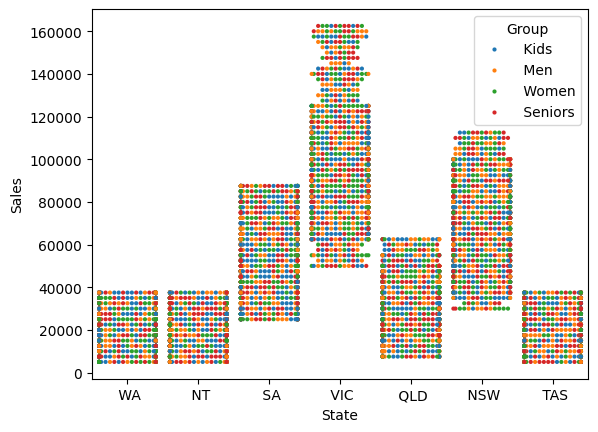

In [21]:
sns.swarmplot(data=df, x='State', y='Sales', size=3, hue='Group', palette='tab10')

<Axes: xlabel='State'>

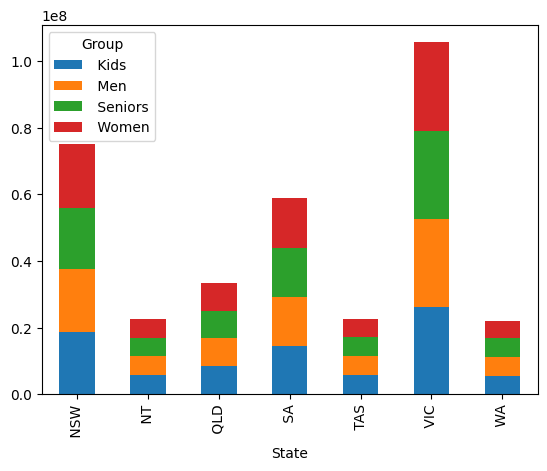

In [22]:
df.groupby(['State','Group'])['Sales'].sum().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

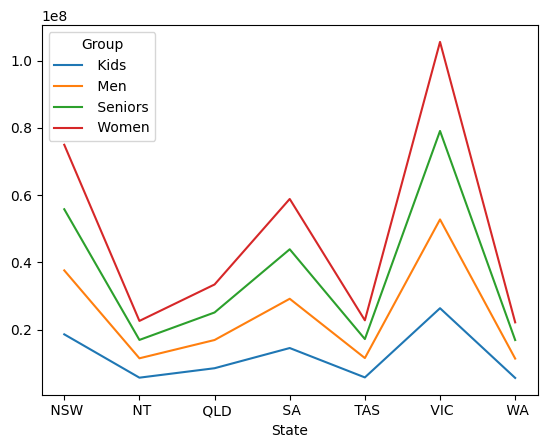

In [24]:
df.groupby(['State','Group'])['Sales'].sum().unstack().plot(kind='line', stacked=True)

<Axes: xlabel='Group'>

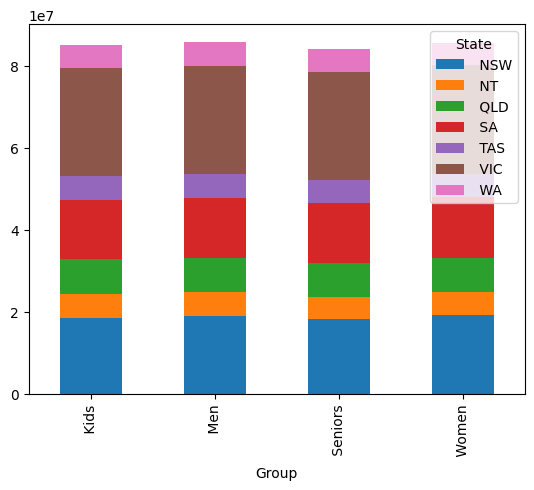

In [23]:
df.groupby(['Group','State'])['Sales'].sum().unstack().plot(kind='bar', stacked=True)

Step b: Build visuals by month and week based on the aggregated data earlier. State that quarterly doesn't make sense since the whole dataset is in 1 quarter.

## Marketing Campaign

In [25]:
df = pd.read_csv(data_path+'marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Step 1:
- cleaning Income column:
    - using replace, remove the $ and , 
    - convert the column to float
    - once you convert to float, you should be able to identify missing values
```python
replace('[$,]','') or replace('\$|,','', regex=True)
```
- convert dt_customer to datetime data type

Step 2:
- simplify the marital status column to only have 2 categories: Married or single 
- build an aggregated table based on new marital status column and education
- use `transform` function in the feature engineering notebook e.g. `df['Score'] = df.groupby('University')['Score'].transform(lambda s: round(s.fillna(s.mean()),2))`
- 

In [26]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

Step 3: Feature Extraction - examples:
- age
- 'Kidhome' + 'Teenhome' = children
- indicator whether the person has children or not
- total purchases :  'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'
- total spending: use the data dictionary for spending columns

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Step 4: 
- build subplots for numeric columns for histograms and boxplots
- after identifying columns with outliers, use outlier treatment: tons of examples are available in the feature engineering notebook
    - IQR
    - percentile
    - z-score

Step 5: examples and description of each method are available in the feature engineering notebook 

Step 7: Hypothesis Testing:
- Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
    - use an age filter (e.g. over 65) 
    - get the 2 channels web and store
    - perform hypothesis testing:
        - $H_0$:  for older customers, web purchases = num of store purchases. $\mu_w$ = $\mu_s$
        - $H_a$:  for older customers, web purchases < num of store purchases. $\mu_w$ < $\mu_s$
    - although the sample size is larger than 30, we don't have the population standard deviation. Therefore, we use t-test.
    - perform independent sample t-test
    - use alternative 'smaller' 
    - use the standard 5% alpha
- Customers with children likely experience time constraints, making online shopping a more convenient option.
- Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
    - store vs other purchases (web + catalog) $\mu_a$ = $\mu_s$ vs $\mu_a$ > $\mu_s$
    - make sure you choose greater alternative in t-test
- Does the United States significantly outperform the rest of the world in total purchase volumes?

Step 8:
- a. add amounts and then plot bar chart broken down by product 
- b. last campaign = response. age band with response = 1 
- c. bar chart of response = 1 and aggregate by country
- d. bar or catplot chart for num of children vs spending
- e. education vs complain 

In [31]:
df['age'] = 2025 - df['Year_Birth']

<Axes: xlabel='age', ylabel='Count'>

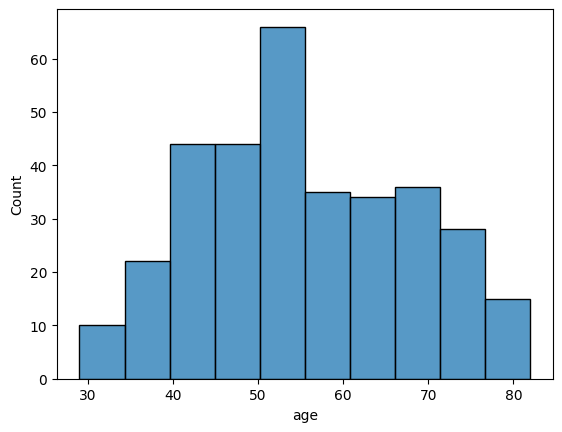

In [ ]:
sns.histplot(data = df[df['Response'] == 1]['age']) #association using highest frequency 